# Synthesized Evaluator MVP

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from synthesized import MetaExtractor
from synthesized.testing.plotting import plot_cross_correlations, plot_correlation_heatmap, plot_second_order_metric_matrix
from synthesized.testing.plotting import plot_continuous_time_series
idx = pd.IndexSlice

Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-32F3-2D31-322D-B531
Expires at: 2020-12-31 00:00:00


In [2]:
# df = pd.read_csv('~/synthesized/data/time-series/sandp500_5yr.csv')
# dp = MetaExtractor.extract(df, id_index='Name', time_index='date')
# dp.set_indices(df)
# stocks = [
#     'AMZN','GOOGL','FB','NFLX','ATVI','EA',
#     'AMGN','BIIB','GILD','BMY','JNJ','MRK','PFE','ILMN','TMO','WAT','BSX','ZBH',
#     'BA','LMT','AAL','DAL',
#     'NKE','TPR','DLTR','TGT',
#     'AMD','NVDA','INTC','STX','XRX','IBM','MSFT','ORCL','ADBE','CRM','GPN','ACN','MA','V',
# ]
# df.loc[idx[stocks, :], :].to_csv('~/synthesized/data/time-series/sandp_mini_5yr.csv')
df = pd.read_csv('~/synthesized/data/time-series/sandp_mini_5yr.csv')
dp = MetaExtractor.extract(df, id_index='Name', time_index='date')
dp.set_indices(df)
df = dp.time_value.make_index_periodic(df)

In [3]:
df

open    high     low   close      volume
Name date                                                  
AAL  2013-02-08   15.07   15.12   14.63   14.75   8407500.0
     2013-02-11   14.89   15.01   14.26   14.46   8882000.0
     2013-02-12   14.45   14.51   14.10   14.27   8126000.0
     2013-02-13   14.30   14.94   14.25   14.66  10259500.0
     2013-02-14   14.94   14.96   13.16   13.99  31879900.0
...                 ...     ...     ...     ...         ...
ZBH  2018-02-01  126.35  128.72  125.71  128.19   1756300.0
     2018-02-02  127.05  127.20  125.61  125.79   1392663.0
     2018-02-05  124.79  127.42  122.37  123.18   2098830.0
     2018-02-06  121.00  122.93  119.50  122.30   2166000.0
     2018-02-07  121.65  123.52  120.74  120.78   1145267.0

[52160 rows x 5 columns]

In [10]:
df_a = df.loc[idx[['AAL','GOOGL','LMT','MA','STX','TMO'], :], :]
df_b = df.loc[idx[['AMZN','BA','DAL','V','WAT','XRX'], :], :]

df_a.index = df_a.index.remove_unused_levels().set_levels(['A1','A2','A3','A4','A5','A6'], level=0)
df_b.index = df_b.index.remove_unused_levels().set_levels(['A2','A3','A1','A4','A6','A5'], level=0)
df_a = df_a.sort_index()
df_b = df_b.sort_index()


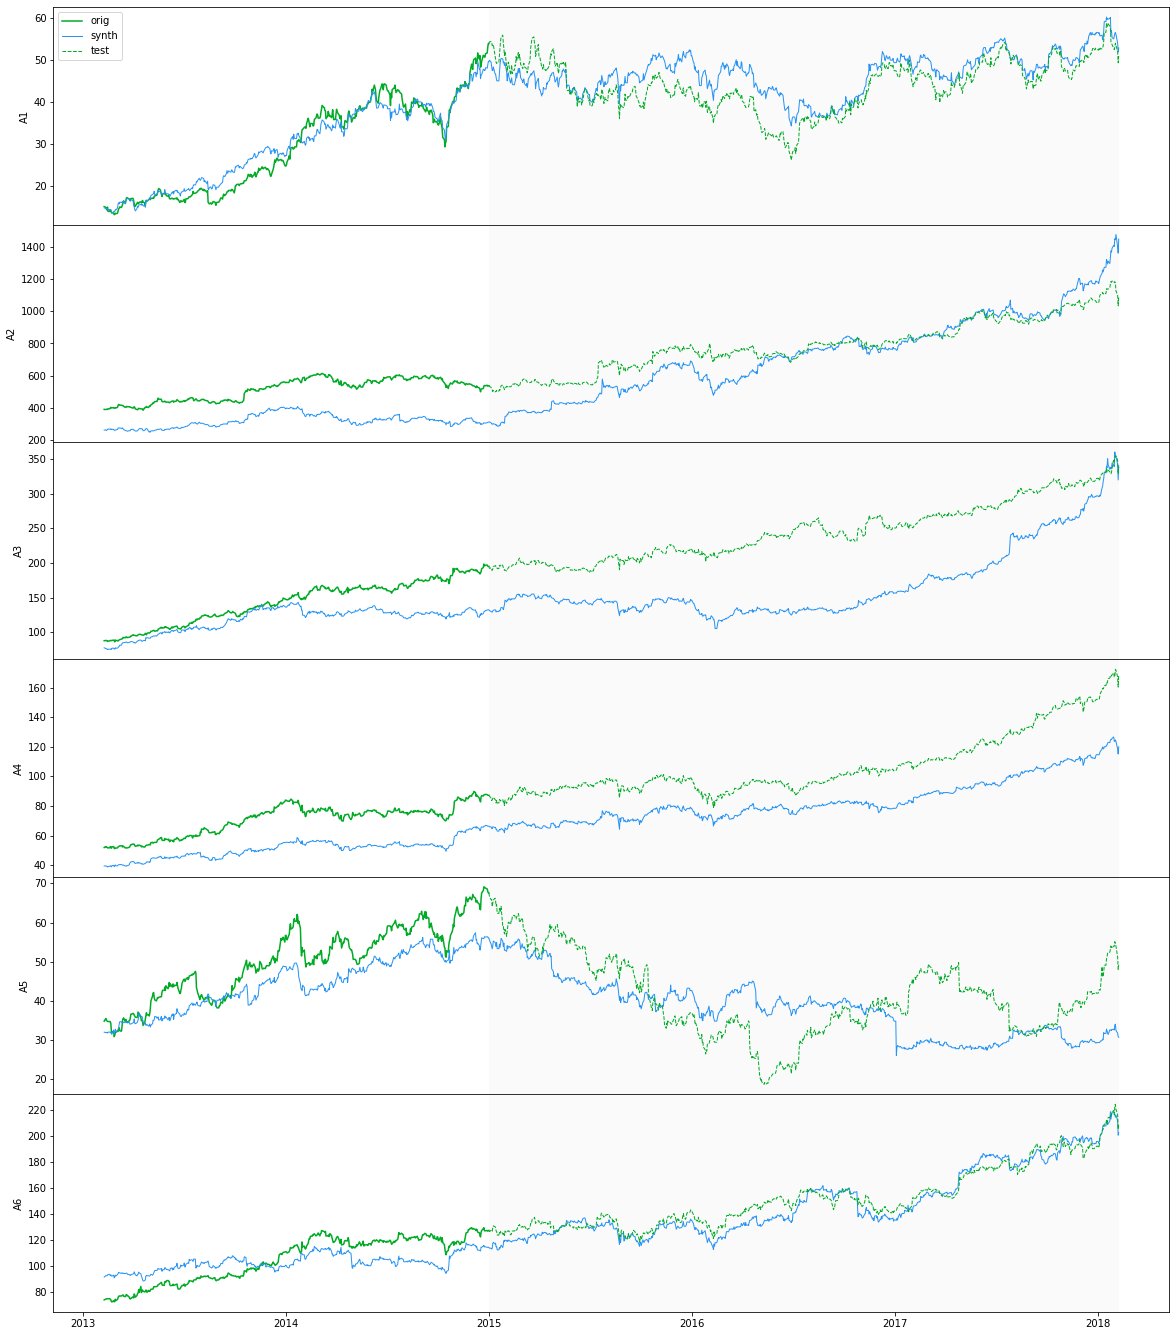

In [11]:
fig = plt.figure(figsize=(20,4*6))
ax = fig.gca()
plot_continuous_time_series(
    df_a, 
    df_b, 
    forecast_from='2015-1-1',
    col='open', identifiers=['A1','A2','A3','A4','A5','A6'], ax=ax
)